In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('text',usetex=True)
plt.rc('font', family='serif')

In [2]:
%matplotlib widget

In [137]:
from sympy import Symbol, symbols, conjugate
from astrobot import ctl2
reload(ctl2)
TF = ctl2.TF
a,s = symbols('a s')
F = TF( (s+1)/((s-a)*(s-conjugate(a))), s,name='F')
F

<module 'astrobot.ctl2' from '/Users/donaldgavel/astrobot/src/astrobot/ctl2.py'>

     s + 1      
────────────────
         ⎛    _⎞
(-a + s)⋅⎝s - a⎠

In [138]:
i = 1j
F1 = F.subs({a:-.1+i})
F1

             s + 1             
───────────────────────────────
(s + 0.1 - ⅈ)⋅(s + 0.1 + 1.0⋅ⅈ)

In [139]:
from sympy import lambdify
f = lambdify([s,a],F.e)

In [140]:
f(0,.1-i)

(0.9900990099009901+0j)

In [141]:
import sympy
def lambdify(args,expr,**kwargs):
    if isinstance(expr,TF):
        expr = expr.e
    return sympy.lambdify(args,expr,**kwargs)

f = lambdify([s,a],F)
f(0,.1-i)

(0.9900990099009901+0j)

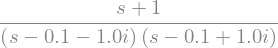

In [142]:
f1 = lambdify([a],F)
f1(0.1-i)

In [143]:
from sympy import N,pi,E
N(1/E,50)

In [144]:
from sympy import N
N(F.e.subs({s:0,a:.1-i}))

In [145]:
N(i)

In [146]:
help(lambdify)

Help on function lambdify in module __main__:

lambdify(args, expr, **kwargs)



In [147]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [148]:
from astrobot import ctl2
reload(ctl2)
TF = ctl2.TF

<module 'astrobot.ctl2' from '/Users/donaldgavel/astrobot/src/astrobot/ctl2.py'>

In [149]:
from sympy import sympify,conjugate
from sympy.abc import a,b,c,s,z
from astrobot.ctl2 import TF, Abs
F = TF( (1+s)/((s-a)*(s-conjugate(a))),s,name='F')
Abs(F)

│     s + 1     │
│───────────────│
│        ⎛    _⎞│
│(a - s)⋅⎝s - a⎠│

In [150]:
abs(F)

│     s + 1     │
│───────────────│
│        ⎛    _⎞│
│(a - s)⋅⎝s - a⎠│

In [151]:
from sympy import Symbol
x = Symbol('x')
abs(-10)
Abs(-10)
abs(x)
Abs(x)
Abs(F)
abs(F)

│     s + 1     │
│───────────────│
│        ⎛    _⎞│
│(a - s)⋅⎝s - a⎠│

│     s + 1     │
│───────────────│
│        ⎛    _⎞│
│(a - s)⋅⎝s - a⎠│

In [152]:
F**2

            2     
     (s + 1)      
──────────────────
                 2
        2 ⎛    _⎞ 
(-a + s) ⋅⎝s - a⎠ 

In [153]:
2*F
F*2
F*F
g = Symbol('g')
g*F
F*g

   2⋅(s + 1)    
────────────────
         ⎛    _⎞
(-a + s)⋅⎝s - a⎠

   2⋅(s + 1)    
────────────────
         ⎛    _⎞
(-a + s)⋅⎝s - a⎠

            2     
     (s + 1)      
──────────────────
                 2
        2 ⎛    _⎞ 
(-a + s) ⋅⎝s - a⎠ 

   g⋅(s + 1)    
────────────────
         ⎛    _⎞
(-a + s)⋅⎝s - a⎠

   g⋅(s + 1)    
────────────────
         ⎛    _⎞
(-a + s)⋅⎝s - a⎠

In [154]:
G = 1 / (1 + g*F)
G

         1          
────────────────────
   g⋅(s + 1)        
──────────────── + 1
         ⎛    _⎞    
(-a + s)⋅⎝s - a⎠    

In [155]:
from astrobot.ctl2 import simplify,together,apart
simplify(G)
together(G)
apart(G,s)
apart(simplify(G),s)

              ⎛    _⎞      
     -(a - s)⋅⎝s - a⎠      
───────────────────────────
                    ⎛    _⎞
g⋅(s + 1) - (a - s)⋅⎝s - a⎠

               ⎛    _⎞      
      (-a + s)⋅⎝s - a⎠      
────────────────────────────
                     ⎛    _⎞
g⋅(s + 1) + (-a + s)⋅⎝s - a⎠

             g⋅(s + 1)               
- ─────────────────────────────── + 1
           _              2     _    
  -a⋅s + a⋅a + g⋅s + g + s  - s⋅a    

             g⋅(s + 1)               
- ─────────────────────────────── + 1
           _              2     _    
  -a⋅s + a⋅a + g⋅s + g + s  - s⋅a    

In [156]:
simplify(F)

     -s - 1    
───────────────
        ⎛    _⎞
(a - s)⋅⎝s - a⎠

In [157]:
apart(F,s)

     s + 1      
────────────────
         ⎛    _⎞
(-a + s)⋅⎝s - a⎠

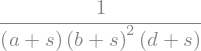

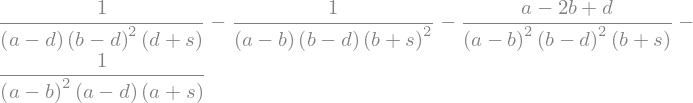

In [158]:
from sympy import symbols
a,b,c,d = symbols('a b c d')
q = 1 / ((s+a)*(s+b)*(s+b)*(s+d))
q
apart(q,s)

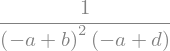

In [159]:
from sympy import residue
residue(q,s,-a)

     s + 1      
────────────────
         ⎛    _⎞
(-a + s)⋅⎝s - a⎠

         s + 1         
───────────────────────
(s - 1 - ⅈ)⋅(s - 1 + ⅈ)

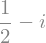

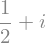

In [160]:
from sympy import I
F
Fn = F.subs({a:1+I})
Fn
residue(Fn.e,s,1+I)
residue(Fn.e,s,1-I)

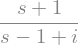

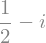

In [161]:
Fn.e*(s-1-I)
simplify((Fn.e*(s-1-I)).subs({s:1+I}))

In [162]:
F
Fn2 = F.subs({a:-3})
Fn2
Fn2.poles()

     s + 1      
────────────────
         ⎛    _⎞
(-a + s)⋅⎝s - a⎠

 s + 1  
────────
       2
(s + 3) 

In [163]:
residue(Fn2.e,s,-3)

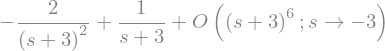

In [164]:
from sympy import series
series(Fn2.e,s,-3)

In [165]:
G

         1          
────────────────────
   g⋅(s + 1)        
──────────────── + 1
         ⎛    _⎞    
(-a + s)⋅⎝s - a⎠    

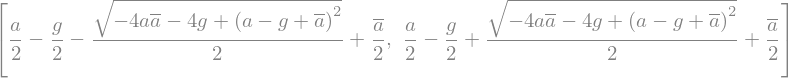

In [166]:
G.poles()

In [167]:
Gn = simplify(G.subs({g:1,a:1+I}))
Gn

 2          
s  - 2⋅s + 2
────────────
  2         
 s  - s + 3 

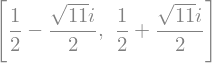

In [168]:
from sympy import N
Gn.poles()
p = [N(x) for x in (Gn.poles())]
p

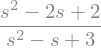

In [169]:
Gn.e

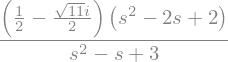

In [170]:
Gn.e*Gn.poles()[0]

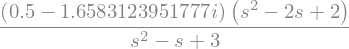

In [171]:
Gn.e*p[0]

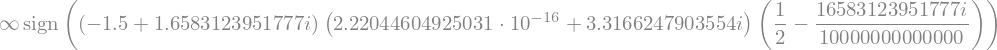

In [172]:
from sympy import limit
limit(_,s,p[0])

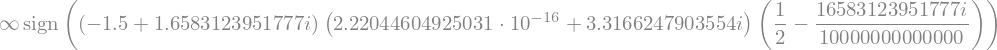

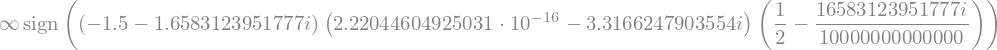

In [173]:
limit(Gn.e*p[0],s,p[0])
limit(Gn.e*p[0],s,p[1])

In [174]:
F.subs({a:1+I})
F.subs({a:1+I}).poles()

         s + 1         
───────────────────────
(s - 1 - ⅈ)⋅(s - 1 + ⅈ)

In [175]:
n,d = Gn.numer,Gn.denom

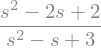

In [176]:
n/d

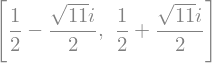

In [177]:
TF(n/d,s).poles()

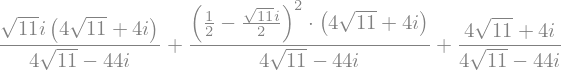

In [178]:
p=_
residue(n/d,s,p[0])

In [179]:
N(_)

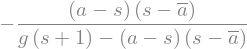

In [180]:
simplify(G.e)

In [181]:
Gs = simplify(G.e)
Gs = Gs.subs({g:1,a:1+I})
Gs = simplify(Gs)
Gs = TF(Gs,s)
Gs

 2          
s  - 2⋅s + 2
────────────
  2         
 s  - s + 3 

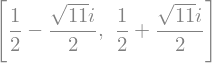

In [182]:
p = Gs.poles()
p

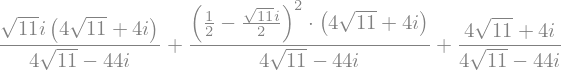

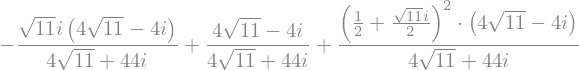

In [183]:
residue(Gs.e,s,p[0])
residue(Gs.e,s,p[1])

In [184]:
Gs.free_symbols == set(Gs.domain)

True

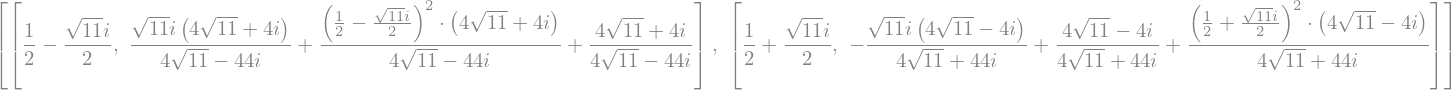

In [185]:
Gs.residues()

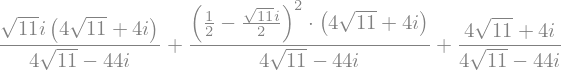

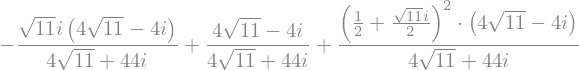

In [186]:
from sympy import latex
from IPython.display import display
for xx in Gs.residues():
    display(xx[1])

In [187]:
Gs
F

 2          
s  - 2⋅s + 2
────────────
  2         
 s  - s + 3 

     s + 1      
────────────────
         ⎛    _⎞
(-a + s)⋅⎝s - a⎠

In [188]:
Fs=F.subs({a:1+I})
Fs

         s + 1         
───────────────────────
(s - 1 - ⅈ)⋅(s - 1 + ⅈ)

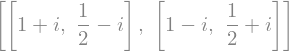

In [189]:
Fs.residues()

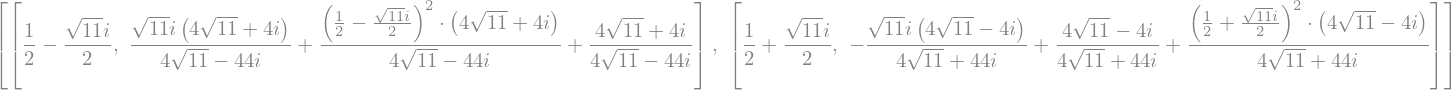

In [190]:
Gs.residues()

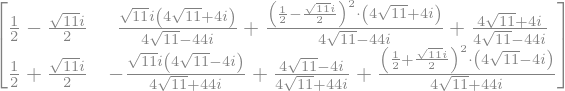

In [191]:
Matrix(_)

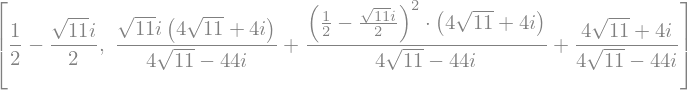

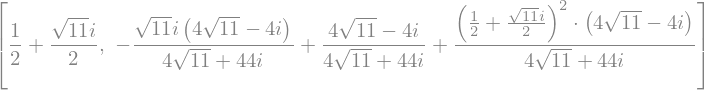

In [192]:
for q in Gs.residues():
    q

In [193]:
from sympy.printing.latex import LatexPrinter, print_latex
for q in Gs.residues():
    display(Math(latex(q)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [194]:
latex(q)

'\\left[ \\frac{1}{2} + \\frac{\\sqrt{11} i}{2}, \\  - \\frac{\\sqrt{11} i \\left(4 \\sqrt{11} - 4 i\\right)}{4 \\sqrt{11} + 44 i} + \\frac{4 \\sqrt{11} - 4 i}{4 \\sqrt{11} + 44 i} + \\frac{\\left(\\frac{1}{2} + \\frac{\\sqrt{11} i}{2}\\right)^{2} \\cdot \\left(4 \\sqrt{11} - 4 i\\right)}{4 \\sqrt{11} + 44 i}\\right]'

In [195]:
Math(latex(q))

<IPython.core.display.Math object>

In [196]:
Math('$$'+latex(q)+'$$')

<IPython.core.display.Math object>

In [197]:
Latex('$'+latex(q)+'$')

<IPython.core.display.Latex object>

In [198]:
Latex(latex(q))

<IPython.core.display.Latex object>

In [199]:
Math(latex(q))

<IPython.core.display.Math object>

In [200]:
help(Math)

Help on class Math in module IPython.core.display:

class Math(TextDisplayObject)
 |  Math(data=None, url=None, filename=None, metadata=None)
 |  
 |  Method resolution order:
 |      Math
 |      TextDisplayObject
 |      DisplayObject
 |      builtins.object
 |  
 |  Methods inherited from DisplayObject:
 |  
 |  __init__(self, data=None, url=None, filename=None, metadata=None)
 |      Create a display object given raw data.
 |      
 |      When this object is returned by an expression or passed to the
 |      display function, it will result in the data being displayed
 |      in the frontend. The MIME type of the data should match the
 |      subclasses used, so the Png subclass should be used for 'image/png'
 |      data. If the data is a URL, the data will first be downloaded
 |      and then displayed. If
 |      
 |      Parameters
 |      ----------
 |      data : unicode, str or bytes
 |          The raw data or a URL or file to load the data from
 |      url : unicode
 |   

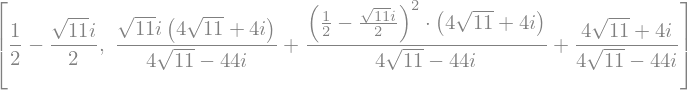

In [201]:
Gs.residues()[0]

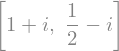

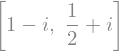

In [202]:
Fs.residues()[0]
Fs.residues()[1]

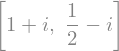

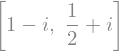

In [203]:
r = Fs.residues()
r[0]
r[1]

In [204]:
from sympy import print_latex,Matrix,init_printing,pprint
init_printing()

In [205]:
from IPython.display import display, Math, Latex
display(Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx'))

<IPython.core.display.Math object>

In [206]:
Sphi = Symbol('S_\phi')

In [207]:
Sphi

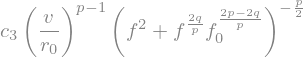

In [208]:
from sympy import Rational
r0 = Symbol('r_0',positive=True)
v = Symbol('v',positive=True)
f = Symbol('f',positive=True)
f0 = Symbol('f_0',positive=True)
p = Symbol('p',positive=True)
q = Symbol('q',positive=True)
c3 = Symbol('c_3')
Sphi = c3*(v/r0)**(p-1)*(f**2+f0**(2*(p-q)/p)*f**(2*q/p))**(-p/2)
Sphi

In [209]:
from sympy import lambdify
Sphi_f = lambdify((f,r0,v,p,q,f0),Sphi.subs({c3:0.077}))

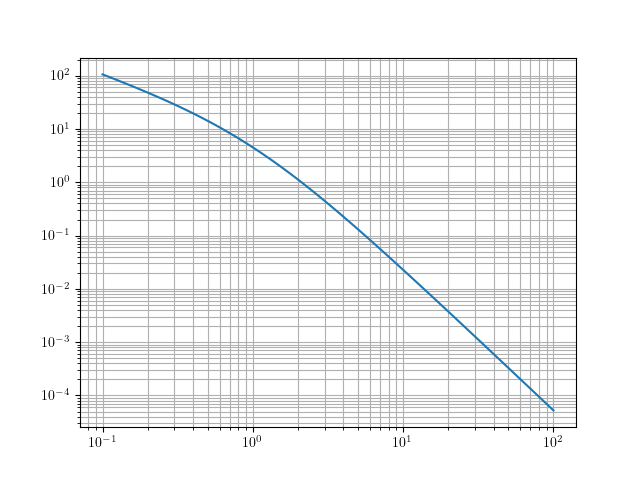

In [210]:
import numpy as np
fa = np.logspace(-1,2,100)
fig = plt.figure()
plt.plot(fa,Sphi_f(fa,0.1,2,Rational(8,3),1.,1.0))
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.grid(True,which='both')

In [211]:
plt.close('all')

In [212]:
Sphi_f = lambdify(f,Sphi)

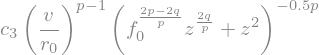

In [213]:
z = Symbol('z')
Sphi_f(z)

In [214]:
from sympy.printing.latex import latex
xx = Sphi.subs({q:0,f0:0,p:Rational(8,3)})
Math(latex(xx,mode='equation'))

<IPython.core.display.Math object>

In [215]:
# https://stackoverflow.com/questions/76170286/only-negative-exponents-in-sympy-expression
exp_hack = lambda e: e.replace(
    lambda x: x.is_Pow and x.exp.is_Rational, # and x.exp<0,
    lambda x: x.base**Symbol(str(x.exp)))
exp_hack((1+x)/x**2)

In [216]:
exp_hack(v**Rational(5,3)*r0**(Rational(-5,3)))

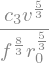

In [217]:
xx

In [218]:
exp_hack(xx)

In [219]:
from sympy import srepr
srepr(_)

"Mul(Symbol('c_3'), Pow(Symbol('f', positive=True), Symbol('-8/3')), Pow(Symbol('r_0', positive=True), Symbol('-5/3')), Pow(Symbol('v', positive=True), Symbol('5/3')))"

In [220]:
from sympy import Mul, Pow
args = [Symbol('c_3'),
    Pow(Symbol('r_0', positive=True), Symbol('-\\frac{5}{3}')),
    Pow(Symbol('v', positive=True), Symbol('\\frac{5}{3}')),
    Pow(Symbol('f', positive=True), Symbol('-\\frac{8}{3}'))]
expr = Mul(*args, evaluate=False)
Math(LatexPrinter(dict(order='none',mode='inline'))._print_Mul(expr))

<IPython.core.display.Math object>

In [221]:
from sympy import Mul, Pow
args = [Symbol('c_3'),
    Pow(Symbol('r_0', positive=True), Rational(-5,3)),
    Pow(Symbol('v', positive=True), Rational(5,3)),
    Pow(Symbol('f', positive=True), Rational(-8,3))]
expr = Mul(*args, evaluate=False)
Math(LatexPrinter(dict(order='none',mode='equation'))._print_Mul(expr))

<IPython.core.display.Math object>

In [222]:
from sympy import sin,cos
x,y = symbols('x y')
ux,uy,uxx,uxy,uyy = symbols("u_x u_y u_{xx} u_{xy} u_{yy}")
u = uxx - 2*sin(x)*uxy - (cos(x) ** 2) * uyy - 2*ux + (2 - cos(x) + 2*sin(x) )*uy
u

In [223]:
# https://stackoverflow.com/questions/16240084/avoid-sorting-args-in-python-module-sympy
from sympy import Add
args = uxx , -2*sin(x)*uxy, -cos(x)**2*uyy, -2*ux, +(2-cos(x)+2*sin(x))*uy
expr = Add(*args, evaluate=False)
from sympy.printing.str import StrPrinter # or LatexPrinter from .latex)
from sympy.printing.latex import LatexPrinter
LatexPrinter(dict(order='none'))._print_Add(expr)

'u_{xx} - 2 u_{xy} \\sin{\\left(x \\right)} - u_{yy} \\cos^{2}{\\left(x \\right)} - 2 u_{x} + u_{y} \\left(2 - \\cos{\\left(x \\right)} + 2 \\sin{\\left(x \\right)}\\right)'

In [224]:
from IPython.display import display, Math, Latex
display(Math(_))

<IPython.core.display.Math object>

In [225]:
x**Rational(5,3)

In [226]:
x**Rational(-5,3)

# Example Problem:

Take a closed loop system and atmospheric spectrum, parameterize and plot it.

In [227]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('text',usetex=True)
plt.rc('font', family='serif')

In [228]:
%matplotlib widget

In [229]:
from astrobot import ctl2
reload(ctl2)
from astrobot.ctl2 import TF, PS
from sympy import Symbol, symbols,exp,I
from sympy.abc import s,z,gamma,T

zi = 1/z
zoh = TF( (1-zi) / (s*T), s,z)
comp = TF( zi/(1-gamma*zi),s,z)
expsub = True
if expsub:
    zoh = zoh.subs({z:exp(s*T)}) 
    comp = comp.subs({z:exp(s*T)}) 
else:
    zoh = zoh.subs({z:1+s*T})
    comp = comp.subs({z:1+s*T})
F = zoh*zoh * comp
#F = F.subs({T:0.002})
F

<module 'astrobot.ctl2' from '/Users/donaldgavel/astrobot/src/astrobot/ctl2.py'>

             2       
  ⎛     -T⋅s⎞   -T⋅s 
  ⎝1 - ℯ    ⎠ ⋅ℯ     
─────────────────────
 2  2 ⎛     -T⋅s    ⎞
T ⋅s ⋅⎝- γ⋅ℯ     + 1⎠

<Figure size 640x480 with 0 Axes>

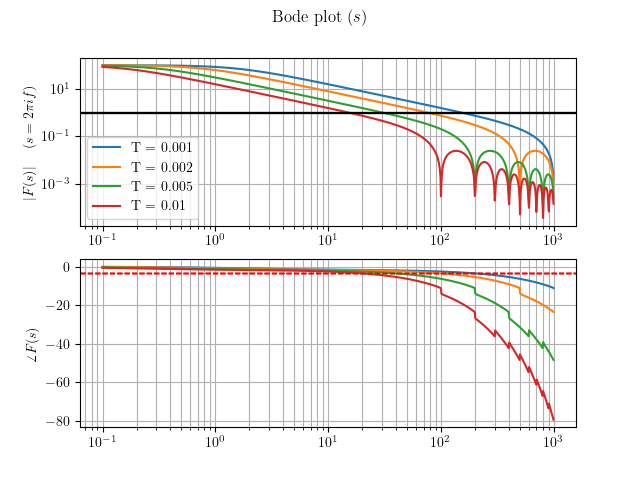

In [230]:
import numpy as np
from sympy.printing.latex import latex
from IPython.display import Math
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.close('all')
plt.figure(1)
plot_kind = 'bode'
freqs = np.logspace(-1,3,1000)[:-1]
for Ts in [.001,.002,.005,.01]:
    label = f'T = {Ts}'
    zoh = TF( (1-zi) / (s*T), s,z)
    comp = TF( zi/(1-gamma*zi),s,z)
    zoh = zoh.subs({z:exp(s*T)})
    comp = comp.subs({z:exp(s*T)})
    F = zoh*zoh * comp
    F.subs({T:Ts,gamma:.99}).plot(plot_kind,f=freqs,fig=1,label=label)

fig = plt.gcf()
ax = fig.axes[0]
ax.legend()
#ax.set_ylim(.1,10)

In [231]:
g = Symbol('g')
G = 1/(1+g*F)
G

            1            
─────────────────────────
                  2      
       ⎛     -T⋅s⎞   -T⋅s
     g⋅⎝1 - ℯ    ⎠ ⋅ℯ    
1 + ─────────────────────
     2  2 ⎛     -T⋅s    ⎞
    T ⋅s ⋅⎝- γ⋅ℯ     + 1⎠

In [232]:
G = ctl2.simplify(G)
G.name = 'G'

In [233]:
G

         2  2 ⎛     T⋅s⎞  2⋅T⋅s        
        T ⋅s ⋅⎝γ - ℯ   ⎠⋅ℯ             
───────────────────────────────────────
                                      2
 2  2 ⎛     T⋅s⎞  2⋅T⋅s     ⎛     T⋅s⎞ 
T ⋅s ⋅⎝γ - ℯ   ⎠⋅ℯ      - g⋅⎝1 - ℯ   ⎠ 

<Figure size 640x480 with 0 Axes>

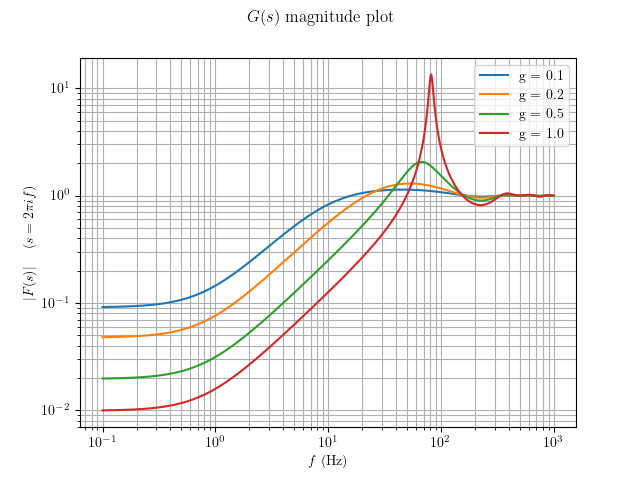

In [234]:
plt.close(3)
plt.figure(3)
for gain in [.1,.2,.5,1.]:
    label = f'g = {gain}'
    G.subs({T:.002,gamma:.99,g:gain}).plot('magnitude',f=freqs,label=label,fig=3)
fig = plt.gcf()
ax = fig.axes[0]
ax.legend()

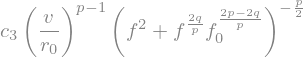

In [235]:
r0 = Symbol('r_0',positive=True)
v = Symbol('v',positive=True)
f = Symbol('f',positive=True)
f0 = Symbol('f_0',positive=True)
p = Symbol('p',positive=True)
q = Symbol('q',positive=True)
c3 = Symbol('c_3')
Sphi = c3*(v/r0)**(p-1)*(f**2+f0**(2*(p-q)/p)*f**(2*q/p))**(-p/2)
Sphi

In [236]:
from sympy import Rational
Sphi = Sphi.subs({r0:0.1,v:2.0,f0:2.0,p:Rational(8,3),q:1,c3:0.077})
Sphi = PS(Sphi)

In [237]:
GG = G.subs({g:.5,T:.002,gamma:.99})
GG = abs(GG)**2
r = Sphi*GG
r

                                                                                                                   2
                                        │                          2 ⎛ 0.004⋅ⅈ⋅π⋅f       ⎞                        │ 
                      4  -0.016⋅π⋅im(f) │                         f ⋅⎝ℯ            - 0.99⎠                        │ 
9.14949990881751e-10⋅π ⋅ℯ              ⋅│─────────────────────────────────────────────────────────────────────────│ 
                                        │                                                                        2│ 
                                        │        2  2 ⎛ 0.004⋅ⅈ⋅π⋅f       ⎞  0.008⋅ⅈ⋅π⋅f       ⎛ 0.004⋅ⅈ⋅π⋅f    ⎞ │ 
                                        │1.6e-5⋅π ⋅f ⋅⎝ℯ            - 0.99⎠⋅ℯ            - 0.5⋅⎝ℯ            - 1⎠ │ 
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                

<Figure size 640x480 with 0 Axes>

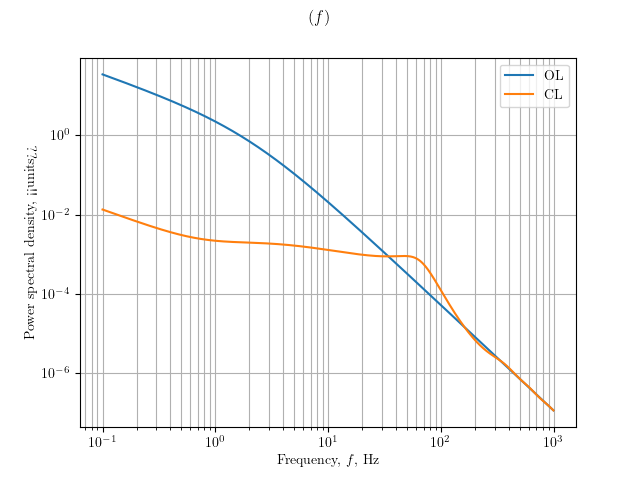

In [238]:
plt.close(4)
plt.figure(4)
Sphi.plot(f=freqs,fig=4,label='OL')
r.plot(fig=4,f=freqs,label='CL')
plt.legend()

In [239]:
import scipy.integrate as integrate
resultOL = integrate.quad(Sphi.fun,1e-1,1e3)
resultCL = integrate.quad(r,1e-1,1e3)
resultOL,resultCL

np.sqrt(resultOL[0])
np.sqrt(resultCL[0])
np.sqrt(resultCL[0]/resultOL[0])

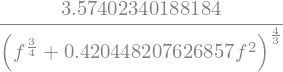

In [240]:
Sphi.e

In [241]:
a = 3.57402340188184/(0.420448207626857**(4/3))
a

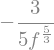

In [242]:
import sympy
f = Symbol('f')
sympy.integrate(f**(-Rational(8,3)),f)

In [243]:
sympy.N(a*sympy.integrate(f**(-Rational(8,3)),(f,20,1e3)))

In [244]:
import scipy
scipy.integrate.quad(lambda f: a*f**(-8/3),20,1e3)

In [245]:
scipy.integrate.quad(Sphi,20,1e3)

In [246]:
scipy.integrate.quad(r,20,1e3)

In [247]:
PS(f**(-Rational(8,3)))

 1  
────
 8/3
f   

In [248]:
from sympy import lambdify
Q=PS((c3*(v/r0)**(5/3)*f**(-Rational(8,3))).subs({v:2,r0:.1,c3:0.077}))
Q

11.3468170158124
────────────────
       8/3      
      f         

In [249]:
Q.plot(f=freqs,fig=4,label='$f^{-8/3}$')
plt.legend()